# IPL data analysis#

Importing pandas and matplotlib modules

In [762]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the csv files 

In [763]:
deliveries = pd.read_csv('/home/user/Downloads/deliveries.csv')
matches = pd.read_csv('/home/user/Downloads/matches.csv')


## Part 1: Histogram for venue in respective seasons

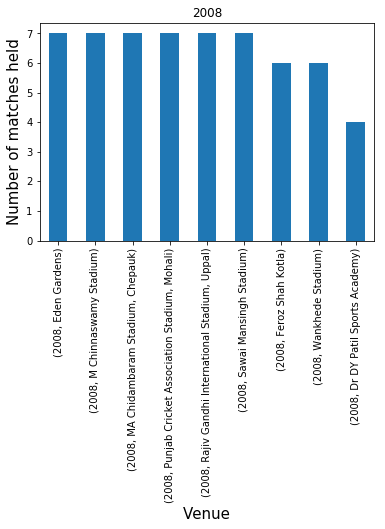

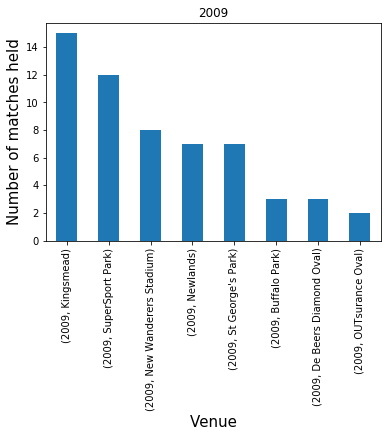

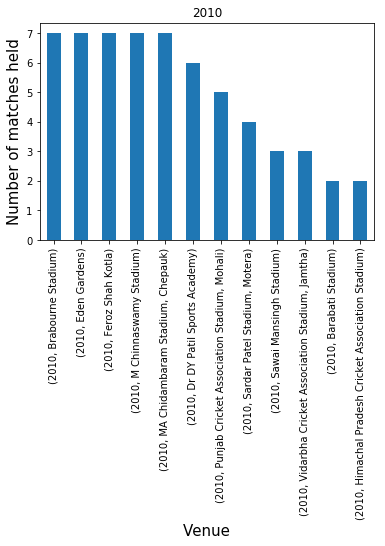

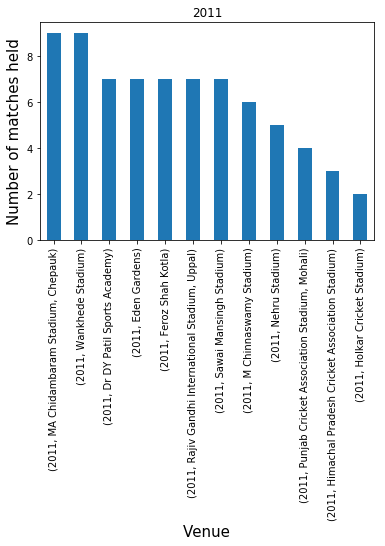

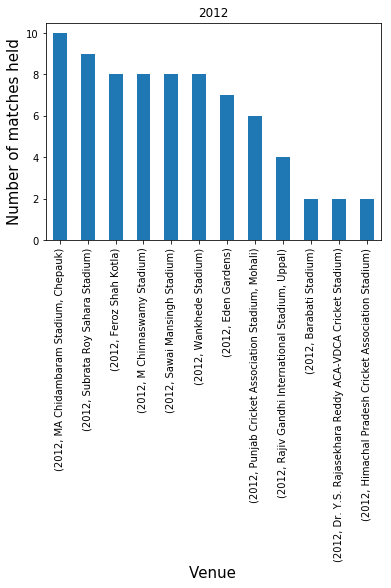

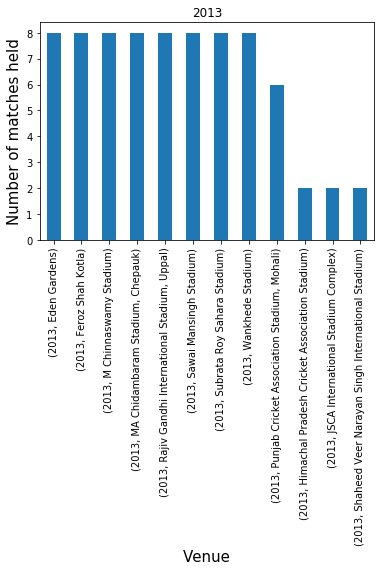

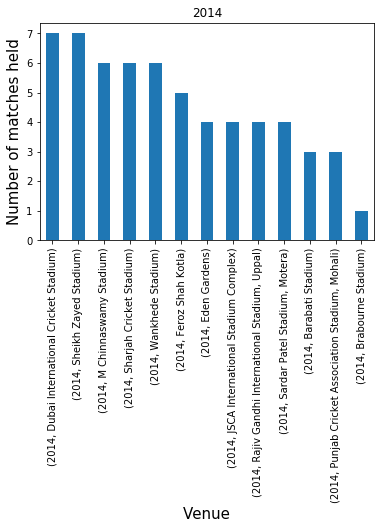

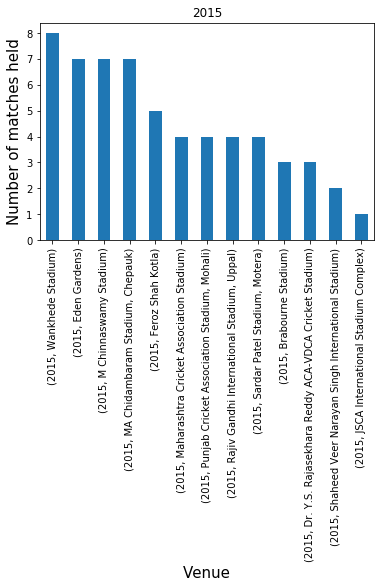

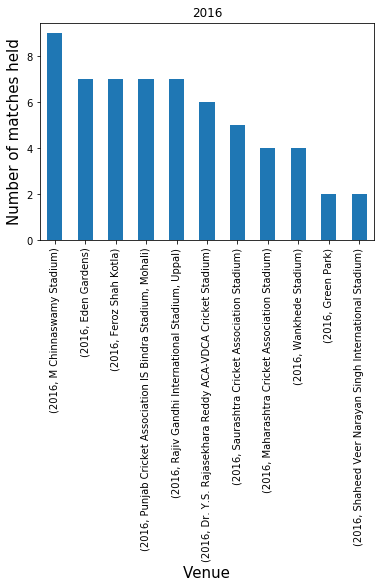

In [815]:
for season in range (2008, 2017):
    season_grouped = matches.groupby(['season']).get_group(season)
    season_venue = pd.DataFrame(season_grouped.groupby(['season'])['venue'].value_counts())
    season_venue.plot(kind = 'bar', legend = False)
    plt.title(season)
    plt.xlabel('Venue',size = 15)
    plt.ylabel('Number of matches held', size = 15)
    plt.show()

## Part 2: Plot of number of matches, with match_id between 500 and 550, w.r.t venue ##

Selecting matches with respected id's

In [792]:
match = matches.loc[(matches['id'] >= 500) & (matches['id'] <550)]
match_id = match['venue']


Converting a series to pandas's dataframe

In [793]:
m = pd.DataFrame(match_id)['venue'].value_counts()

Plot 

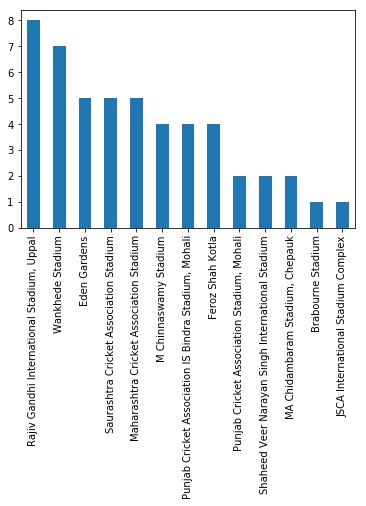

In [794]:
m.plot(kind = 'bar')

## Part 3: Aggregated Number of Runs per Match, first by Venue followed by Innings##

Delivery file id name changed and both files merged

In [795]:
delivery = deliveries.rename(columns = {'match_id': 'id'})

p_totalfile  = pd.merge(matches, delivery, on = 'id')


Only venue and total runs in different innings are selected

In [809]:
p_inn1 = p_totalfile.loc[p_totalfile.inning == 1, ['venue','total_runs']]
p_inn2 = p_totalfile.loc[p_totalfile.inning == 2, ['venue','total_runs']]

Runs vs venue using crosstab

In [797]:
p_runs1 = pd.crosstab(p_inn1.total_runs,p_inn1.venue)
p_runs2 = pd.crosstab(p_inn2.total_runs,p_inn2.venue)

Selecting total runs for both innings

In [798]:
runns_1 = []
runns_2 = []
h = len(p_runs1.columns)
for i in range(0,h):
    runns1 = (p_runs1.iloc[:,i]*p_runs1.index).sum()
    runns_1.append(runns1)
    runns1 = 0
for i in range(0,ho):
    runns2 = (p_runs2.iloc[:,i]*p_runs2.index).sum()
    runns_2.append(runns2)
    runns2 = 0  
  

Selecting the number of matches in each venue

In [811]:
season_vene = matches['venue'].value_counts()
season_vene
venue = []
no_of_matches = []
for i in season_vene.iteritems():
    venue.append(i[0])
    no_of_matches.append(i[1])

venue_matches = pd.DataFrame({'Venue':venue,'No_of_matches':no_of_matches})

Making the dataframe

In [813]:
venue_inn1_inn2 = pd.DataFrame({'Venue':list(p_runs1.columns),'Inns_1':runns_1, 'Inns_2':runns_2})

Averaging the runs with corresponding matches in a venue

In [801]:
venue_avg12_runn12 = pd.merge(venue_inn1_inn2, venue_matches, on = 'Venue')
venue_avg12_runn12['Inns_1_avg'] = venue_avg12_runn12['Inns_1']/venue_avg12_runn12['No_of_matches']
venue_avg12_runn12['Inns_2_avg'] = venue_avg12_runn12['Inns_2']/venue_avg12_runn12['No_of_matches']

Plot

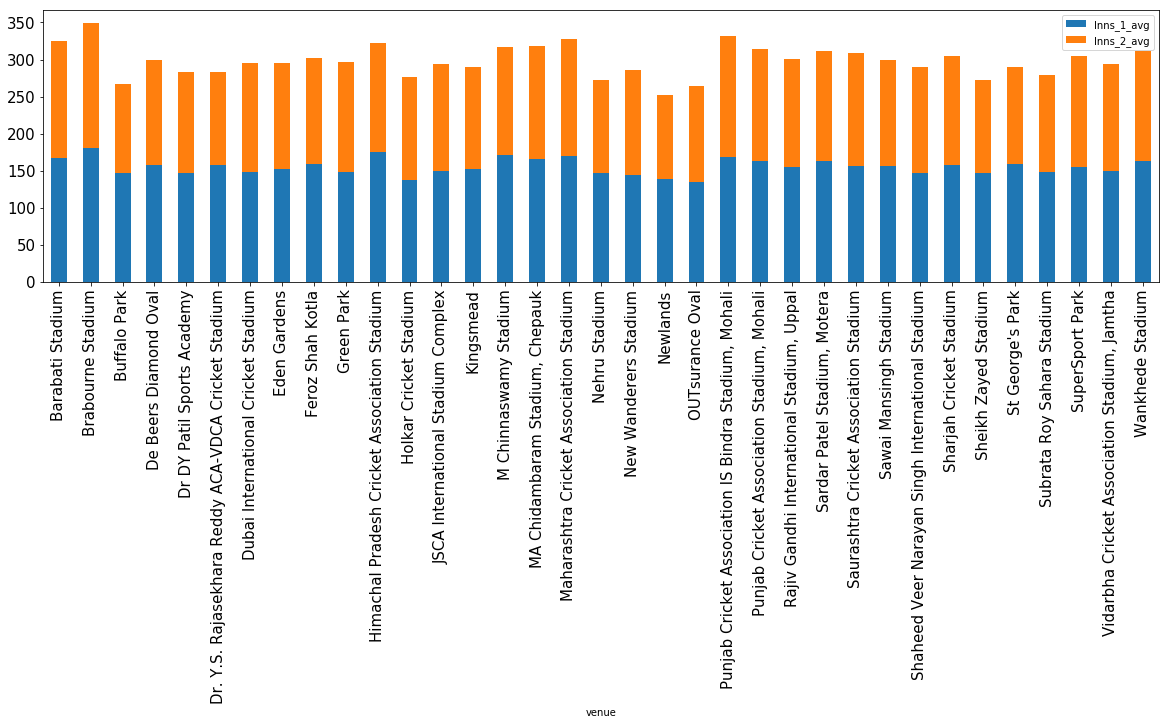

In [804]:
venue_avg12 = pd.DataFrame({'venue':list(p_runs1.columns),
                            'Inns_1_avg':venue_avg12_runn12.Inns_1_avg, 
                            'Inns_2_avg':venue_avg12_runn12.Inns_2_avg})
venue_avg12.set_index('venue', inplace= True)


venue_avg12.plot(kind = 'bar', stacked = True, figsize = (20,5), fontsize = 15)
